In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot
import numpy as np
import seaborn as sb
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
df10 = pd.read_csv('top10s.csv',encoding='ISO-8859-1')

In [3]:
yearless_df = df10.drop(['year', 'pop'], axis=1)
yearless_df=yearless_df.drop_duplicates()

In [4]:
yearless_df['top genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
australian dance               6
complextro                     6
hip pop                        6
edm                            5
australian pop                 5
atl hip hop                    5
permanent wave                 4
hip hop                        4
latin                          4
colombian pop                  3
tropical house                 3
candy pop                      2
canadian hip hop               2
belgian edm                    2
brostep                        2
folk-pop                       2
escape room                    2
detroit hip hop                2
downtempo                      2
baroque po

In [5]:
for i in yearless_df['top genre']:
    if 'pop' in i :
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'pop')
    elif 'hip hop' in i :
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'hip hop')
    elif 'edm' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'edm')
    elif 'r&b' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'pop')
    elif 'latin' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'latin')
    elif 'room' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'room')
    elif 'electro' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'edm')
    elif 'house' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'house')
        
for i in df10['top genre']:
    if 'pop' in i :
        df10['top genre'] = df10['top genre'].replace(i, 'pop')
    elif 'hip hop' in i :
        df10['top genre'] = df10['top genre'].replace(i, 'hip hop')
    elif 'edm' in i:
        df10['top genre'] = df10['top genre'].replace(i, 'edm')
    elif 'r&b' in i:
        df10['top genre'] = df10['top genre'].replace(i, 'pop')
    elif 'latin' in i:
        df10['top genre'] = df10['top genre'].replace(i, 'latin')
    elif 'room' in i:
        df10['top genre'] = df10['top genre'].replace(i, 'room')
    elif 'electro' in i:
        df10['top genre'] = df10['top genre'].replace(i, 'edm')
    elif 'house' in i:
        df10['top genre'] = df10['top genre'].replace(i, 'house')
    
yearless_df['top genre'] = yearless_df['top genre'].replace('complextro', 'edm')
yearless_df['top genre'] = yearless_df['top genre'].replace('chicago rap', 'hip hop')

df10['top genre'] = df10['top genre'].replace('complextro', 'edm')
df10['top genre'] = df10['top genre'].replace('chicago rap', 'hip hop')


In [6]:
#Change columns name
df = yearless_df

df.rename(columns={'title': 'song', 
                   'artist':'artist',
                   'top genre':'genre',
                   'bpm':'bpm',
                   'nrgy': 'energy',
                   'dnce': 'danceability',
                   'dB':'loudness',
                   'live': 'liveness',
                   'val': 'valence',
                   'dur': 'length',
                   'acous': 'acoutsticness',
                   'spch': 'speechiness'}, inplace=True)

df10.rename(columns={'title': 'song', 
                   'artist':'artist',
                   'top genre':'genre',
                   'bpm':'bpm',
                   'nrgy': 'energy',
                   'dnce': 'danceability',
                   'dB':'loudness',
                   'live': 'liveness',
                   'val': 'valence',
                   'dur': 'length',
                   'acous': 'acoutsticness',
                   'spch': 'speechiness'}, inplace=True)

EDA

In [7]:
df1=df['genre'].value_counts().head(10)
df1.index
fig = px.pie(df1, names=df1.index, values='genre', title = 'Popular genre',labels='genre')
fig.show()

In [8]:
#Popular artist
fig=px.bar(df, x = df['artist'].value_counts().head(10), y=df['artist'].value_counts().head(10).index, 
           title = 'Popular artist')
fig.show()

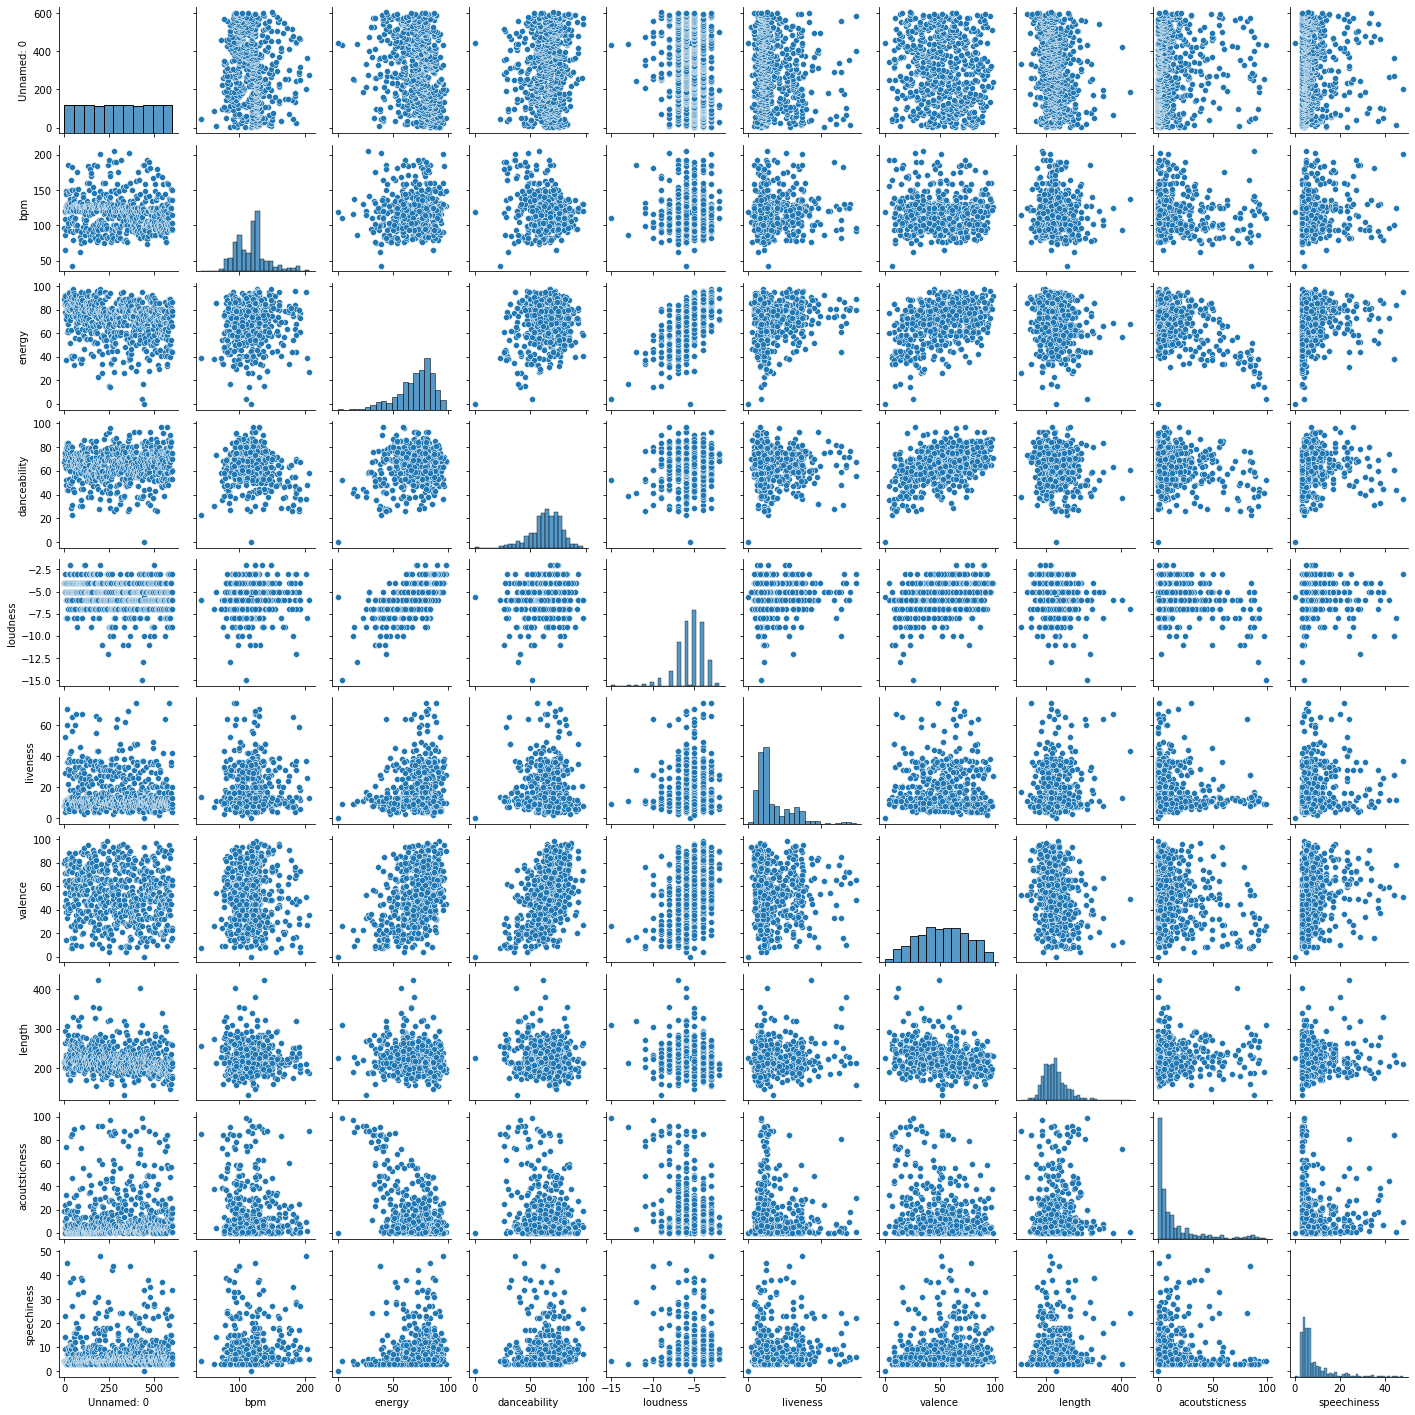

In [33]:
sns.pairplot(df, height = 2)
plt.show()

In [9]:
#Variable relationships
fig = px.scatter(df10,x='loudness', y='energy',color='energy',hover_name='song',hover_data=['artist','year'],title='Relationship loudness and energy')
fig.show()

fig = px.scatter(df10,x='danceability', y='bpm',color='bpm',hover_name='song',hover_data=['artist','year'], title='Relationship Danceability and bpm')
fig.show()

fig = px.scatter(df10,x='danceability', y='valence',color='valence',hover_name='song',hover_data=['artist','year'],title='Relationship Danceability and valence')
fig.show()


In [10]:
#most popular artist in 2019
fig = px.scatter(df10.query('year==2019'), y='pop', x='artist', hover_name='song', color='pop', title = 'Popular artist in 2019' )
fig.show()

#most popular artist in 2018
fig = px.scatter(df10.query('year==2018'), y='pop', x='artist', hover_name='song', color='pop', title = 'Popular artist in 2018' )
fig.show()

#most popular artist in 2017
fig = px.scatter(df10.query('year==2017'), y='pop', x='artist', hover_name='song', color='pop', title = 'Popular artist in 2017' )
fig.show()

#most popular artist in 2016
fig = px.scatter(df10.query('year==2016'), y='pop', x='artist', hover_name='song', color='pop', title = 'Popular artist in 2016' )
fig.show()

Clustering

In [14]:
#Change null values
df.bpm = df.bpm.replace(0, df.bpm.mean())
df.bpm.unique()

df.loudness = df.loudness.replace(-60, df.loudness.mean())
df.loudness.unique()

array([ -4.       ,  -5.       ,  -3.       ,  -6.       ,  -8.       ,
        -7.       ,  -2.       ,  -9.       , -11.       , -12.       ,
       -10.       , -15.       , -13.       ,  -5.5787728])

In [18]:
X_std = StandardScaler().fit_transform(new_df)

pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_std) 


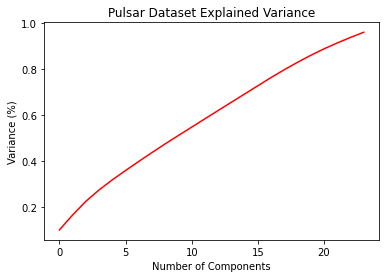

In [19]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), c='r')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(principalComponents)

Set cluster number use SSR elbow

[Text(0.5, 0, 'K'),
 Text(0, 0.5, 'sum of squared distances'),
 Text(0.5, 1.0, 'Elbow graph')]

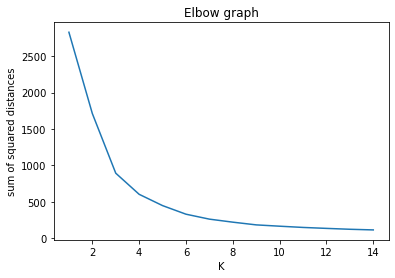

In [23]:
# SSR elbow
sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    sum_of_squared_distances.append(km.inertia_)
    
ax = sns.lineplot(x=K, y = sum_of_squared_distances)
ax.set(xlabel='K', ylabel='sum of squared distances', title='Elbow graph')


In [24]:
#k-means
k=3

model = KMeans(n_clusters = k, algorithm='auto')
model.fit(pca_df)
predict = pd.DataFrame(model.predict(pca_df))
predict.columns = ['predict']
label = model.fit(pca_df).labels_

n_clusters_ = len(set(label)) 
print('Estimated number of clusters: %d' % n_clusters_)



Estimated number of clusters: 3


In [25]:
#silhouette_score
label = pd.DataFrame(model.fit(pca_df).labels_)
silhouette_score(pca_df, model.fit(pca_df).labels_, metric='euclidean')

0.6072213217980009

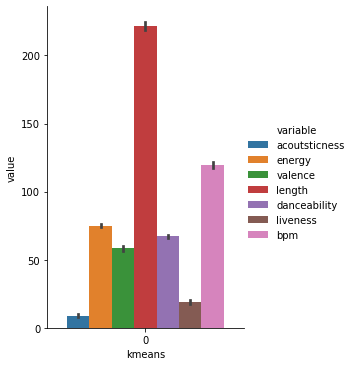

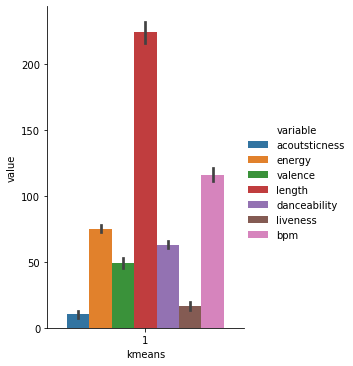

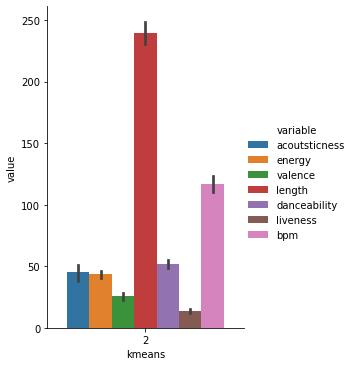

In [26]:
#cluster result 
df_scaled = pd.DataFrame(new_df)
df_scaled['kmeans'] = model.fit(pca_df).labels_
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :].groupby('kmeans').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
    selected_columns = list(results.sort_values('Var', ascending=False,).head(7).Variable.values) + ['kmeans']
    tidy = df_scaled[selected_columns].melt(id_vars='kmeans')

for i in range(3):
    sns.catplot(x='kmeans', y='value', hue='variable', data=tidy[tidy['kmeans']==i], height=5, aspect=.7, kind='bar')    


In [27]:
#means shift clustering
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
ms.fit(pca_df)
predict = pd.DataFrame(ms.predict(pca_df))

predict.columns = ['predict']
label3 = ms.fit(pca_df).labels_

n_clusters_ = len(set(label3)) 
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 4


In [28]:
#silhouette_score
label3 = pd.DataFrame(ms.fit(pca_df).labels_)
silhouette_score(pca_df, ms.fit(pca_df).labels_, metric='euclidean')

0.5845944828202018

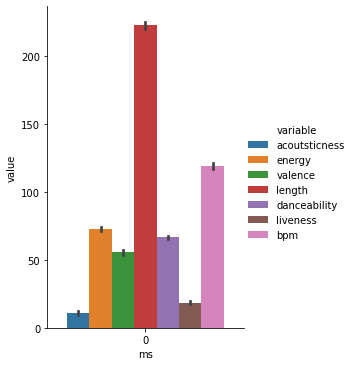

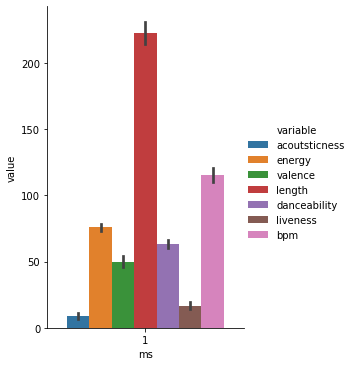

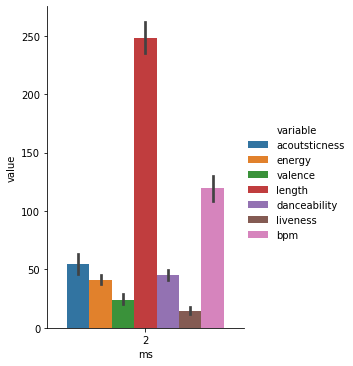

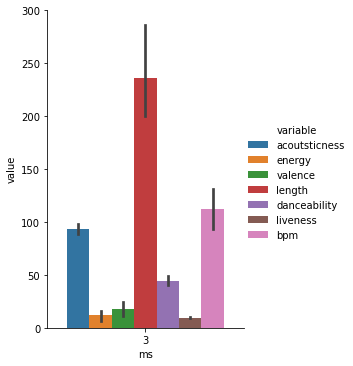

In [29]:
#cluster result 
df_scaled['ms'] = ms.fit(pca_df).labels_
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :].groupby('ms').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
    selected_columns = list(results.sort_values('Var', ascending=False,).head(7).Variable.values) + ['ms']
    tidy = df_scaled[selected_columns].melt(id_vars='ms')
df_mean.columns[1:]
for i in range(4):
    sns.catplot(x='ms', y='value', hue='variable', data=tidy[tidy['ms']==i], height=5, aspect=.7, kind='bar')    

In [30]:
# AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ac.fit_predict(pca_df)
label2 = ac.fit(pca_df).labels_

n_clusters_ = len(set(label2)) 
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [31]:
#silhouette_score
label2 = pd.DataFrame(ac.fit(pca_df).labels_)
silhouette_score(pca_df, ac.fit(pca_df).labels_, metric='euclidean')

0.5848440500950474

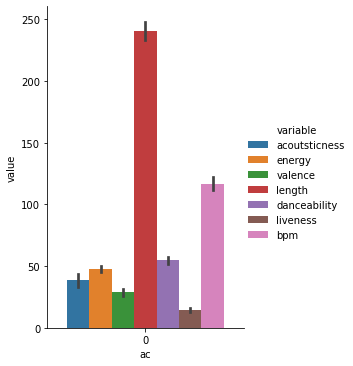

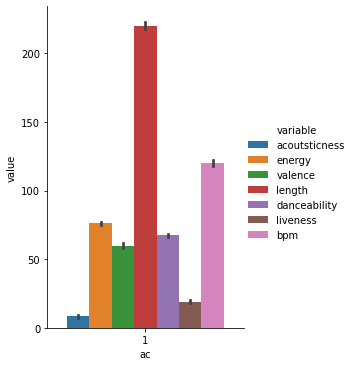

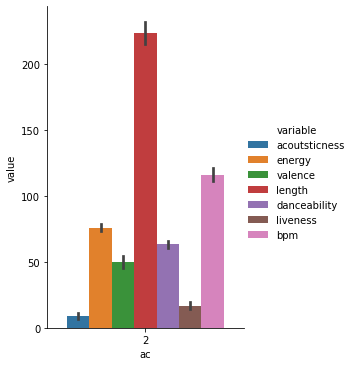

In [32]:
#clustering result
df_scaled['ac'] = ac.fit(pca_df).labels_
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :].groupby('ac').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
    selected_columns = list(results.sort_values('Var', ascending=False,).head(7).Variable.values) + ['ac']
    tidy = df_scaled[selected_columns].melt(id_vars='ac')

for i in range(3):
    sns.catplot(x='ac', y='value', hue='variable', data=tidy[tidy['ac']==i], height=5, aspect=.7, kind='bar')    
